In [4]:
import predictbg
import numpy as np
from flask import jsonify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
carbs_start = 10
bg = 100
targetbg_start = 90
intervals = 1
time = np.arange(0, 4*60, intervals)
inscarbRatio = 10
correctionRatio = 75
timetotarget = 120
timetopeak = 60

In [3]:
predict = predictbg.GlucosePredict(carbs_start, inscarbRatio, correctionRatio, timetotarget, timetopeak, bg, targetbg_start, time=time)

In [ ]:
pre

In [13]:
pred = predict.getprediction(time=3, currentbg=100, carbs=10)
pred

100.49348935226358

In [24]:
import requests

headers = {
    'accept': 'application/json',
}

params = {
    'carbs': '10',
    'time': '4',
    'currentbg': '100',
}

response = requests.get('http://0.0.0.0:8000/prediction', params=params, headers=headers)
response.json()

{'status_code': '0', 'status_message': 'Success', 'data': 100.87324124624138}

In [23]:
import requests

headers = {
    'accept': 'application/json',
}

params = {
    'carbs': '10',
    'currentbg': '100',
}

response = requests.get('http://0.0.0.0:8000/predictions', params=params, headers=headers)
# show the response as a json object
data = response.json()
# data = data['data']
# convert data to numeric
data = pd.DataFrame(data['data'])
data = data.apply(pd.to_numeric, errors='coerce')
data



,0
0,100.000000
1,100.055125
2,100.220059
3,100.493489
4,100.873241
...,...
235,90.000060
236,90.000053
237,90.000047
238,90.000041


In [5]:
# create a function to plot the data
def plot_data(df):
    fig, ax = plt.subplots()
    sns.lineplot(data=df, ax=ax)
    ax.set(xlabel='time', ylabel='prediction (mg/DL)', title='prediction of BG')
    ax.grid(True)
    ax.set_ylim(40, )
    ax.axhline(y=100, color='g', linestyle='-')
    ax.axhline(y=120, color='r', linestyle='--')
    ax.axhline(y=80, color='r', linestyle='--')
    # plot the data
    plt.show()

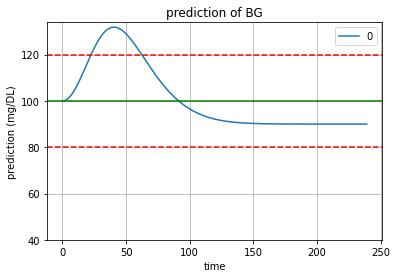

In [10]:
plot_data(data)

In [8]:
prediction = predict.getpredictions(bg, carbs_start, time)
# convert to json
# prediction_json = jsonify(prediction)
prediction



NameError: name 'predict' is not defined